In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/iot_botnet_dataset/features_having_most_influence_on_Botnet_IoT.csv")

In [ ]:
df_train=pd.read_csv(r"/content/drive/MyDrive/iot_botnet_dataset/UNSW_2018_IoT_Botnet_Final_10_best_Training.csv")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Spliting the dataset into categorical and numerical features
def getFeatures(df):
    num_features = df.select_dtypes(include=[np.number])
    cat_features = df.select_dtypes(include=[np.object])
    return num_features,cat_features

In [ ]:
train_num_features,train_cat_features = getFeatures(df_train)

In [ ]:
num_features,cat_features = getFeatures(df)


In [ ]:

train_cat_features=train_cat_features.drop(['category','subcategory'],axis=1)

In [ ]:
cat_features=cat_features.drop(['category','subcategory'],axis=1)

In [ ]:
#TARGET ENCODING (Mean encoding with multiclass target variable)
# We do mean encoding wrt each class of the target variable after one - hot encoding the target variable
#REFER TO https://towardsdatascience.com/target-encoding-for-multi-class-classification-c9a7bcb1a53
def target_encode_multiclass(X,y): #X,y are pandas df and series
    y=y.astype(str)   #convert to string to onehot encode
    enc=ce.OneHotEncoder().fit(y)
    y_onehot=enc.transform(y)
    print(y_onehot)
    class_names=y_onehot.columns  #names of onehot encoded columns
    X_obj=X.select_dtypes('object') #separate categorical columns
    X=X.select_dtypes(exclude='object') #X is empty because we dont have numerical features and we ar
    for class_ in class_names:
      
        enc=ce.TargetEncoder()
        enc.fit(X_obj,y_onehot[class_]) #convert all categorical 
        temp=enc.transform(X_obj)       #columns for class_
        temp.columns=[str(x)+'_'+str(class_) for x in temp.columns]
        X=pd.concat([X,temp],axis=1)    #add to original dataset
      
    return X

In [ ]:
pip install category_encoders

In [ ]:
import category_encoders as ce
train_encoded_cat_features=target_encode_multiclass(train_cat_features,df_train["category"])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


         category_1  category_2  category_3  category_4  category_5
0                 1           0           0           0           0
1                 1           0           0           0           0
2                 1           0           0           0           0
3                 0           1           0           0           0
4                 1           0           0           0           0
...             ...         ...         ...         ...         ...
2934812           0           1           0           0           0
2934813           1           0           0           0           0
2934814           0           1           0           0           0
2934815           0           1           0           0           0
2934816           0           1           0           0           0

[2934817 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: Future

In [ ]:
#DOING THE ABOVE CATEGORY ENCODING FOR TEST DATASET
test_encoded_cat_features=target_encode_multiclass(cat_features,df["category"])
test_encoded_cat_features

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


        category_1  category_2  category_3  category_4  category_5
0                1           0           0           0           0
1                0           1           0           0           0
2                0           1           0           0           0
3                0           1           0           0           0
4                1           0           0           0           0
...            ...         ...         ...         ...         ...
733700           1           0           0           0           0
733701           0           1           0           0           0
733702           0           1           0           0           0
733703           1           0           0           0           0
733704           0           1           0           0           0

[733705 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: Future

,proto_category_1,saddr_category_1,sport_category_1,daddr_category_1,dport_category_1,proto_category_2,saddr_category_2,sport_category_2,daddr_category_2,dport_category_2,proto_category_3,saddr_category_3,sport_category_3,daddr_category_3,dport_category_3,proto_category_4,saddr_category_4,sport_category_4,daddr_category_4,dport_category_4,proto_category_5,saddr_category_5,sport_category_5,daddr_category_5,dport_category_5
0,0.517034,0.462725,0.352941,0.173510,0.461713,0.475314,0.512719,0.647059,0.809391,0.538059,0.007437,0.024460,2.785828e-09,0.017080,0.000217,0.000215,0.000067,1.641159e-11,0.000008,0.000011,0.000000,0.000028,2.147310e-12,0.000011,0.0
1,0.371697,0.442030,0.624840,0.173510,0.461713,0.588028,0.535132,0.375137,0.809391,0.538059,0.040206,0.022773,2.255324e-05,0.017080,0.000217,0.000030,0.000065,1.328633e-07,0.000008,0.000011,0.000039,0.000000,1.738399e-08,0.000011,0.0
2,0.517034,0.471855,0.499994,0.173510,0.461713,0.475314,0.507779,0.500003,0.809391,0.538059,0.007437,0.020299,3.054655e-06,0.017080,0.000217,0.000215,0.000067,1.799527e-08,0.000008,0.000011,0.000000,0.000000,2.354521e-09,0.000011,0.0
3,0.371697,0.442030,0.352941,0.173510,0.461713,0.588028,0.535132,0.588235,0.809391,0.538059,0.040206,0.022773,5.882353e-02,0.017080,0.000217,0.000030,0.000065,1.641159e-11,0.000008,0.000011,0.000039,0.000000,2.147310e-12,0.000011,0.0
4,0.371697,0.471855,0.333335,0.930698,0.461713,0.588028,0.507779,0.666664,0.000000,0.538059,0.040206,0.020299,4.134467e-07,0.069225,0.000217,0.000030,0.000067,2.435655e-09,0.000077,0.000011,0.000039,0.000000,3.186838e-10,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,0.517034,0.442030,0.437500,0.988210,0.461713,0.475314,0.535132,0.562500,0.000000,0.538059,0.007437,0.022773,7.572665e-09,0.011790,0.000217,0.000215,0.000065,4.461131e-11,0.000000,0.000011,0.000000,0.000000,5.836993e-12,0.000000,0.0
733701,0.517034,0.431057,0.333335,0.173510,0.461713,0.475314,0.547414,0.666664,0.809391,0.538059,0.007437,0.021471,4.134467e-07,0.017080,0.000217,0.000215,0.000058,2.435655e-09,0.000008,0.000011,0.000000,0.000000,3.186838e-10,0.000011,0.0
733702,0.371697,0.471855,0.411765,0.173510,0.461713,0.588028,0.507779,0.529412,0.809391,0.538059,0.040206,0.020299,5.882353e-02,0.017080,0.000217,0.000030,0.000067,1.641159e-11,0.000008,0.000011,0.000039,0.000000,2.147310e-12,0.000011,0.0
733703,0.371697,0.431057,0.500000,0.989069,0.461713,0.588028,0.547414,0.500000,0.000000,0.538059,0.040206,0.021471,5.595474e-08,0.010919,0.000217,0.000030,0.000058,3.296348e-10,0.000012,0.000011,0.000039,0.000000,4.312979e-11,0.000000,0.0


Now we hav Target_Encoded the categorical features of both test and train datasets, we didnt take the following encoding aproaches : 
1. one hot coding - Dimentionality problem arises
2. label encoding - data is not ordinal
3. mean encoding - Dependent variable is not binary and same mean appears for more than 1 unique value, it is a multiclass classification problem
Refer to article for further understanding : https://towardsdatascience.com/target-encoding-for-multi-class-classification-c9a7bcb1a53

In [ ]:
train_num_features=train_num_features.drop(['pkSeqID','attack'],axis=1)

In [ ]:
num_features=num_features.drop(['pkSeqID','attack'],axis=1)

In [ ]:
from sklearn import preprocessing
  
df_train.category = df_train.category.map({'DDoS': 0, 'DoS': 1, 'Normal': 2, 'Reconnaissance': 3, 'Theft': 4} )

df_train['category']

0          0
1          0
2          0
3          1
4          0
          ..
2934812    1
2934813    0
2934814    1
2934815    1
2934816    1
Name: category, Length: 2934817, dtype: int64

We have applied Feature scaling and transformation and now all the feature values range between 0 and 1.

In [ ]:
#TRAIN NUM FEATURES WITHOUT SCALING
df_train_final=pd.concat([train_num_features,train_encoded_cat_features,df_train['category']],axis=1)
df_train_final

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,proto_category_1,saddr_category_1,sport_category_1,daddr_category_1,dport_category_1,proto_category_2,saddr_category_2,sport_category_2,daddr_category_2,dport_category_2,proto_category_3,saddr_category_3,sport_category_3,daddr_category_3,dport_category_3,proto_category_4,saddr_category_4,sport_category_4,daddr_category_4,dport_category_4,proto_category_5,saddr_category_5,sport_category_5,daddr_category_5,dport_category_5,category
0,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,0.474868,0.513404,0.500000,0.809518,0.538172,0.517479,0.461608,0.500000,0.173172,0.461624,0.007471,0.024890,0.0,0.017288,0.000198,0.000181,0.000067,0.0,0.000011,0.000005,0.000000,0.000031,0.0,0.000012,0.0,0
1,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,0.588456,0.513404,0.571429,0.809518,0.538172,0.371094,0.461608,0.428571,0.173172,0.461624,0.040375,0.024890,0.0,0.017288,0.000198,0.000028,0.000067,0.0,0.000011,0.000005,0.000047,0.000031,0.0,0.000012,0.0,0
2,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,0.588456,0.546615,0.600000,0.809518,0.538172,0.371094,0.431252,0.400000,0.173172,0.461624,0.040375,0.022084,0.0,0.017288,0.000198,0.000028,0.000049,0.0,0.000011,0.000005,0.000047,0.000000,0.0,0.000012,0.0,0
3,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,0.474868,0.513404,0.531915,0.809518,0.538172,0.517479,0.461608,0.468085,0.173172,0.461624,0.007471,0.024890,0.0,0.017288,0.000198,0.000181,0.000067,0.0,0.000011,0.000005,0.000000,0.000031,0.0,0.000012,0.0,1
4,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,0.474868,0.546615,0.521739,0.809518,0.538172,0.517479,0.431252,0.478261,0.173172,0.461624,0.007471,0.022084,0.0,0.017288,0.000198,0.000181,0.000049,0.0,0.000011,0.000005,0.000000,0.000000,0.0,0.000012,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934812,253370,0.016992,100,4.082509,4,4.102515,100,0.000000,0.243473,4.124047,0.474868,0.507210,0.533333,0.000000,0.538172,0.517479,0.472855,0.466667,0.930475,0.461624,0.007471,0.019883,0.0,0.069500,0.000198,0.000181,0.000051,0.0,0.000025,0.000005,0.000000,0.000001,0.0,0.000000,0.0,1
2934813,231693,1.922317,100,0.000000,4,2.718527,100,0.000000,0.490800,4.090534,0.474868,0.513404,0.512195,0.809518,0.538172,0.517479,0.461608,0.487805,0.173172,0.461624,0.007471,0.024890,0.0,0.017288,0.000198,0.000181,0.000067,0.0,0.000011,0.000005,0.000000,0.000031,0.0,0.000012,0.0,0
2934814,158616,2.112228,100,0.000000,4,2.110766,100,0.000000,0.207444,4.332615,0.474868,0.507210,0.560000,0.000000,0.538172,0.517479,0.472855,0.440000,0.930475,0.461624,0.007471,0.019883,0.0,0.069500,0.000198,0.000181,0.000051,0.0,0.000025,0.000005,0.000000,0.000001,0.0,0.000000,0.0,1
2934815,179855,0.000000,100,0.000000,3,0.000000,100,0.000000,0.162130,0.000000,0.588456,0.546615,0.522727,0.000000,0.538172,0.371094,0.431252,0.477273,0.989186,0.461624,0.040375,0.022084,0.0,0.010805,0.000198,0.000028,0.000049,0.0,0.000009,0.000005,0.000047,0.000000,0.0,0.000000,0.0,1


In [ ]:
from sklearn import preprocessing
  
df.category = df.category.map({'DDoS': 0, 'DoS': 1, 'Normal': 2, 'Reconnaissance': 3, 'Theft': 4} )

df['category']

0         1
1         0
2         0
3         0
4         1
         ..
733700    1
733701    0
733702    0
733703    1
733704    0
Name: category, Length: 733705, dtype: int64

In [ ]:
#NON SCALED TEST NUM FEATURES
df_test_final=pd.concat([num_features,test_encoded_cat_features,df['category']],axis=1)
df_test_final

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,proto_category_1,saddr_category_1,sport_category_1,daddr_category_1,dport_category_1,proto_category_2,saddr_category_2,sport_category_2,daddr_category_2,dport_category_2,proto_category_3,saddr_category_3,sport_category_3,daddr_category_3,dport_category_3,proto_category_4,saddr_category_4,sport_category_4,daddr_category_4,dport_category_4,proto_category_5,saddr_category_5,sport_category_5,daddr_category_5,dport_category_5,category
0,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,0.517034,0.462725,0.352941,0.173510,0.461713,0.475314,0.512719,0.647059,0.809391,0.538059,0.007437,0.024460,2.785828e-09,0.017080,0.000217,0.000215,0.000067,1.641159e-11,0.000008,0.000011,0.000000,0.000028,2.147310e-12,0.000011,0.0,1
1,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,0.371697,0.442030,0.624840,0.173510,0.461713,0.588028,0.535132,0.375137,0.809391,0.538059,0.040206,0.022773,2.255324e-05,0.017080,0.000217,0.000030,0.000065,1.328633e-07,0.000008,0.000011,0.000039,0.000000,1.738399e-08,0.000011,0.0,0
2,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,0.517034,0.471855,0.499994,0.173510,0.461713,0.475314,0.507779,0.500003,0.809391,0.538059,0.007437,0.020299,3.054655e-06,0.017080,0.000217,0.000215,0.000067,1.799527e-08,0.000008,0.000011,0.000000,0.000000,2.354521e-09,0.000011,0.0,0
3,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,0.371697,0.442030,0.352941,0.173510,0.461713,0.588028,0.535132,0.588235,0.809391,0.538059,0.040206,0.022773,5.882353e-02,0.017080,0.000217,0.000030,0.000065,1.641159e-11,0.000008,0.000011,0.000039,0.000000,2.147310e-12,0.000011,0.0,0
4,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,0.371697,0.471855,0.333335,0.930698,0.461713,0.588028,0.507779,0.666664,0.000000,0.538059,0.040206,0.020299,4.134467e-07,0.069225,0.000217,0.000030,0.000067,2.435655e-09,0.000077,0.000011,0.000039,0.000000,3.186838e-10,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432,0.517034,0.442030,0.437500,0.988210,0.461713,0.475314,0.535132,0.562500,0.000000,0.538059,0.007437,0.022773,7.572665e-09,0.011790,0.000217,0.000215,0.000065,4.461131e-11,0.000000,0.000011,0.000000,0.000000,5.836993e-12,0.000000,0.0,1
733701,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634,0.517034,0.431057,0.333335,0.173510,0.461713,0.475314,0.547414,0.666664,0.809391,0.538059,0.007437,0.021471,4.134467e-07,0.017080,0.000217,0.000215,0.000058,2.435655e-09,0.000008,0.000011,0.000000,0.000000,3.186838e-10,0.000011,0.0,0
733702,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142,0.371697,0.471855,0.411765,0.173510,0.461713,0.588028,0.507779,0.529412,0.809391,0.538059,0.040206,0.020299,5.882353e-02,0.017080,0.000217,0.000030,0.000067,1.641159e-11,0.000008,0.000011,0.000039,0.000000,2.147310e-12,0.000011,0.0,0
733703,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000,0.371697,0.431057,0.500000,0.989069,0.461713,0.588028,0.547414,0.500000,0.000000,0.538059,0.040206,0.021471,5.595474e-08,0.010919,0.000217,0.000030,0.000058,3.296348e-10,0.000012,0.000011,0.000039,0.000000,4.312979e-11,0.000000,0.0,1


# MODEL BUILDING

#  MULTINOMIAL LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


X_train = df_train_final.iloc[:,:-1]
y_train = df_train_final['category']
X_test =  df_test_final.iloc[:,:-1]
y_test =  df_test_final['category']


In [ ]:
from sklearn.preprocessing import StandardScaler

X_train = pd.DataFrame(StandardScaler().fit_transform(X_train))
X_test = pd.DataFrame(StandardScaler().fit_transform(X_test))


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_train)

X_train = pd.DataFrame(pca.transform(X_train),columns=("1st_principal_component","2nd_principal component"))
X_test = pd.DataFrame(pca.transform(X_test),columns=("1st_principal_component","2nd_principal component"))


In [ ]:
print(y_train.head())
print(y_test.head())

0    0
1    0
2    0
3    1
4    0
Name: category, dtype: int64
0    1
1    0
2    0
3    0
4    1
Name: category, dtype: int64


In [ ]:
df_train_copy=pd.read_csv(r"/content/drive/MyDrive/iot_botnet_dataset/UNSW_2018_IoT_Botnet_Final_10_best_Training.csv")
df_test_copy=pd.read_csv(r"/content/drive/MyDrive/iot_botnet_dataset/features_having_most_influence_on_Botnet_IoT.csv")

In [ ]:
X_train['category']=df_train_copy['category']
X_test['category']=df_test_copy['category']
print(X_train)
print(X_test)

         1st_principal_component  2nd_principal component category
0                      -1.174980                 1.294078     DDoS
1                      -0.460244                 0.048380     DDoS
2                      -0.313739                -0.342253     DDoS
3                      -0.831065                 1.669057      DoS
4                      -1.294374                 1.822995     DDoS
...                          ...                      ...      ...
2934812                -0.970750                 1.814066      DoS
2934813                -1.156034                 1.318500     DDoS
2934814                -0.704360                 1.351833      DoS
2934815                 0.458182                -2.442754      DoS
2934816                 0.681457                -2.742826      DoS

[2934817 rows x 3 columns]
        1st_principal_component  2nd_principal component category
0                     -0.856517                 0.643669      DoS
1                     -0.698244     

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


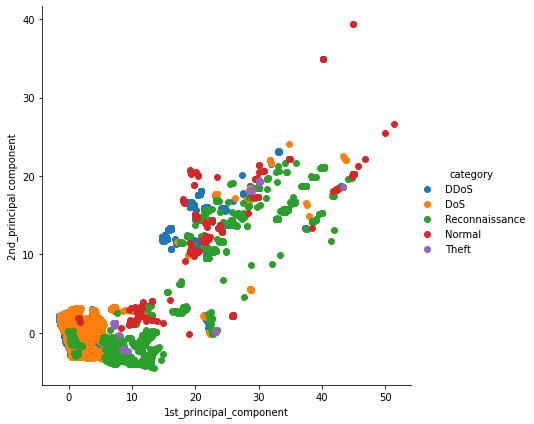

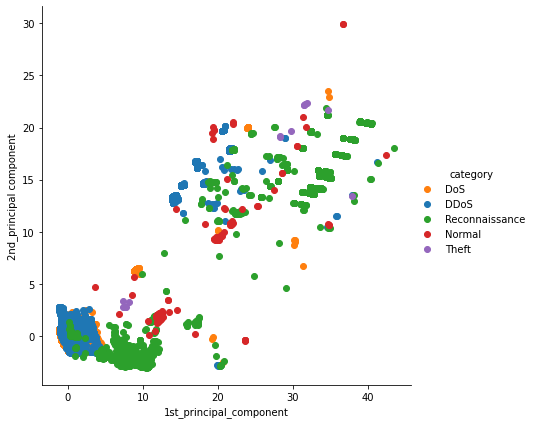

In [ ]:
palette = {"DDoS":"tab:Blue",
           "DoS":"tab:orange", 
           "Reconnaissance":"tab:green",
           "Normal":"tab:red",
           "Theft":"tab:purple"}
sns.FacetGrid(X_train,hue='category',size=6,palette=palette).map(plt.scatter,'1st_principal_component','2nd_principal component').add_legend()
sns.FacetGrid(X_test,hue='category',size=6,palette=palette).map(plt.scatter,'1st_principal_component','2nd_principal component').add_legend()


In [ ]:
from sklearn import linear_model


SGDClf = linear_model.SGDClassifier(max_iter=10000,class_weight="balanced",n_jobs=-1,penalty="elasticnet").fit(X_train,y_train)


KeyboardInterrupt: ignored

In [ ]:
y_pred = SGDClf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)
print(cm)

0.6094370353207351
[[293334  91178      1    796      0]
 [193460 136444      2    206      0]
 [     0      0      3    102      2]
 [    22    124    651  17366      0]
 [     0      0      6      8      0]]


In [ ]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 1000).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)

In [ ]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
  
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import 




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 5 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=",i,"is",metrics.accuracy_score(y_test, Pred_y))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
error_rate = []
for i in range(2,11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  print("Accuracy of model at K=",i,"is",metrics.accuracy_score(y_test, pred_i))

  

In [ ]:
#NORMALISING DATA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test =  pd.DataFrame(scaler.fit_transform(X_test))

In [ ]:
def buildModel (model,X_train,y_train):
    model.fit(X_train,y_train)  
    y_pred = model.predict(X_test)
    return y_pred

    

In [ ]:
def scoreModel(y_test,y_pred):
    print("Accuracy = "+str(accuracy_score(y_test,y_pred)))
    confusion_matrix_test = confusion_matrix(y_test, y_pred)
    print(confusion_matrix_test)


In [ ]:
"""
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=500,max_depth=5,booster='gbtree',n_jobs=-1,learning_rate=0.1,reg_lambda=0.01,reg_alpha=0.3)
xgb.fit(X_train,y_train)
y_pred_XGB = xgb.predict(X_test)
print("Accuracy = "+str(accuracy_score(y_test,y_pred_XGB)))
#print(confusion_matrix_balanced)

from xgboost import XGBClassifier


clf = XGBClassifier(max_depth=5, objective='multi:softmax', n_estimators=100,num_classes=5)

clf.fit(X_train,y_train)  
y_pred_XGB = clf.predict(X_test)"""

"""

In [ ]:
"""
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1)
y_pred = buildModel(svc,X_train, y_train)
scoreModel(y_test,y_pred)
"""


In [ ]:
from sklearn import svm
lsvc = svm.LinearSVC(verbose=0,dual=False,class_weight='balanced')
lsvc.fit(X_train, y_train)
ypred = lsvc.predict(X_test)
print("Accuracy = "+str(accuracy_score(y_test,ypred)))

cm = confusion_matrix(y_test, ypred)
print(cm)


Accuracy = 0.15846832173693787
[[     1 385308      0      0      0]
 [225670 104427      1     14      0]
 [     6     25     76      0      0]
 [   112   6284      2  11765      0]
 [     0     14      0      0      0]]


In [ ]:
from sklearn import svm

svc = svm.SVC(kernel='linear', C=1, gamma='auto',probability=False,n_jobs=-1,cache_size=7000).fit(X_train,y_train)
ypred = svc.predict(X_test)
print("Accuracy = "+str(accuracy_score(y_test,ypred)))

cm = confusion_matrix(y_test, ypred)
print(cm)

TypeError: ignored

In [ ]:
# Bagging creates several models that rely on the same algorithm.
# The training of each model uses a different subset of data sampled randomly from the training set.
# By default Bagging uses soft voting when its base estimator can provide its measure of confidence,
# Hence the SVC model is set to have probability=True
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(SVC(gamma='scale', probability=False, random_state=42),
                                bootstrap=True, # set to False to use Pasting instead of Bagging
                                n_estimators=100, # number of SVC models to create
                                max_samples=10000, # each model is trained from randomly sampled 100 instances 
                                random_state=42,
                               )
bagging_clf.fit(X_train, y_train) # training
y_pred_bagging = bagging_clf.predict(X_test) # predicting
accuracy_score(y_test, y_pred_bagging) # evaluating

In [ ]:
import os
os.cpu_count()

2